In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

In [2]:
iris = datasets.load_iris()

In [3]:
# lets convert to DF
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['CLASS'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Student score vs. hours studied

In [4]:
# load data
df = pd.read_csv('data/Grade_Set_1.csv')
df.head()

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79


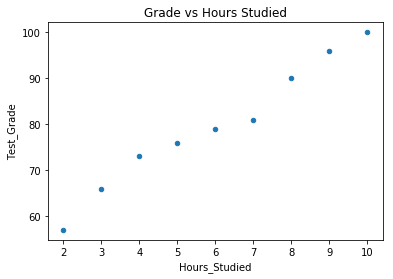

In [5]:
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')

In [6]:
df.corr()

,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.987797
Test_Grade,0.987797,1.000000


### Linear Regression
Let’s use the linear regression function from the scikit-learn library to find the values of m (x’s coefficient) and c (intercept).

    y=mx+c

In [7]:
# Create linear regression object
lr = lm.LinearRegression()

In [8]:
# independent variable
x = df.Hours_Studied[:, np.newaxis]
# Dependent variable
y = df.Test_Grade.values

In [9]:
# Train the mode using the training sets
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print('Intercept: ', lr.intercept_)
print('Coefficient: ', lr.coef_)

Intercept:  49.67777777777776
Coefficient:  [5.01666667]


In [11]:
# manual prediction for a given value of x
print("Manual prdiction :", 49.67777777777776 + 5.01666667*6)

Manual prdiction : 79.77777779777776


In [12]:
# predict using the built-in function
print('Using predict function: ', lr.predict(6))

Using predict function:  [79.77777778]


Text(0.5,0,'Hours Studied')

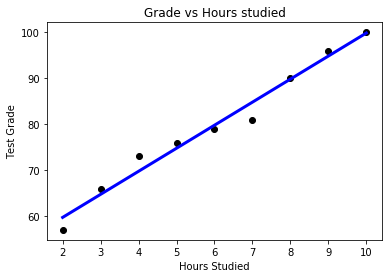

In [13]:
# Plotting fitted line
plt.scatter(x, y, color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours studied')
plt.ylabel('Test Grade')
plt.xlabel('Hours Studied')

### How good is your model?
There are three metrics widely used for evaluating linear model performance.

    R-squared
    RMSE (Root Mean Squared Error)
    MAE (Mean Absolute Error)
R-squared = Total Sum of Square Residual (∑ SSR) / Sum of Square Total(∑ SST)

R-Squared

    R-squared value designates the total proportion of variance in the dependent variable explained by the independent variable
    R-squared: It is a value between 0 and 1; the value toward 1 indicates a better model fit.

RMSE
    
    RMSE indicates how close the predicted values are to the actual values; hence a lower RMSE value signifies that the model performance is good.

MAE
    
    This is the mean or average of absolute value of the errors, that is, the predicted - actual.

In [14]:
# Linear regression model accuracy metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [15]:
# Add predicted value to DF
df['Test_Grade_Pred'] = lr.predict(x)
df.head()

,Hours_Studied,Test_Grade,Test_Grade_Pred
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778


In [16]:
# Manually calculating R Squared
df['SST'] = np.square(df['Test_Grade'] - df['Test_Grade'].mean())
df['SSR'] = np.square(df['Test_Grade_Pred'] - df['Test_Grade'].mean())
df.head()

,Hours_Studied,Test_Grade,Test_Grade_Pred,SST,SSR
0,2,57,59.711111,518.827160,402.671111
1,3,66,64.727778,189.827160,226.502500
2,4,73,69.744444,45.938272,100.667778
3,5,76,74.761111,14.271605,25.166944
4,6,79,79.777778,0.604938,0.000000


In [17]:
print('Sum of SSR', df['SSR'].sum())
print('Sum of SST', df['SST'].sum())
print('R-squared: ', (df['SSR'].sum()/df['SST'].sum()))

Sum of SSR 1510.0166666666673
Sum of SST 1547.5555555555557
R-squared:  0.9757431074095351


In [18]:
# Using built-in function
print('R=-squared: ', r2_score(df.Test_Grade, df.Test_Grade_Pred))
print('Mean absoulute Error: ', mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))

R=-squared:  0.9757431074095347
Mean absoulute Error:  1.618518518518523
Root Mean Squared Error:  2.0422995995497297


### Polynomial Regression

    Quadratic(2) : y = m1x + m2x^2 + c
    Cubic(3) : y = m1x + m2x^2 + m3x^3 + c
    Nth : y = m1x + m2x^2 + m3x^3 + .. + mnx^n + c

In [19]:
# 1000 samples between -3 to 3
x = np.linspace(-3, 3, 1000)

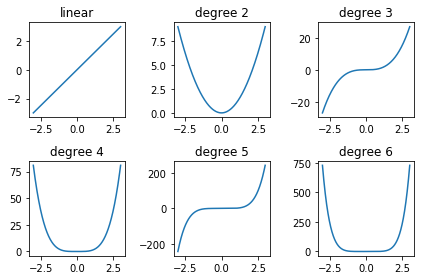

In [20]:
# Plot subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

ax1.plot(x, x)
ax1.set_title('linear')
ax2.plot(x, x**2)
ax2.set_title('degree 2')
ax3.plot(x, x**3)
ax3.set_title('degree 3')
ax4.plot(x, x**4)
ax4.set_title('degree 4')
ax5.plot(x, x**5)
ax5.set_title('degree 5')
ax6.plot(x, x**6)
ax6.set_title('degree 6')
plt.tight_layout()# tidy layout

#### Polynomial regression example

In [21]:
df = pd.read_csv('data/Grade_Set_2.csv')
df.head()

,Hours_Studied,Test_Grade
0,0.5,20
1,1.0,21
2,2.0,22
3,3.0,23
4,4.0,25


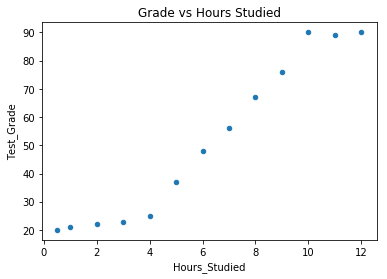

In [22]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')

In [23]:
# check the correlation between variables
print("Correlation Matrix: ")
df.corr()

Correlation Matrix: 


,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.974868
Test_Grade,0.974868,1.000000


In [24]:
# Create linear regression object
lr = lm.LinearRegression()

In [25]:
x= df.Hours_Studied[:, np.newaxis]
y= df.Test_Grade

In [26]:
# Train the model using the training sets
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,0,'Hours_Studied')

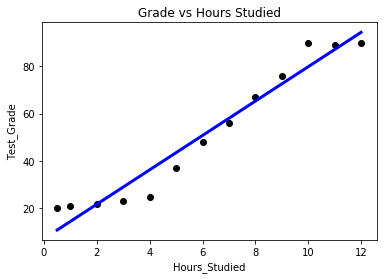

In [27]:
# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

In [28]:
print('R-squared: ', r2_score(y, lr.predict(x)))

R-squared:  0.9503677766997879


#### R-squared for different polynomial degrees

In [29]:
lr = lm.LinearRegression()

In [30]:
x= df.Hours_Studied        # independent variable
y= df.Test_Grade # dependent variable

0.9503677766997879
0.9608726568678714
0.9938323120374665
0.9955000184096712
0.9956204913897356


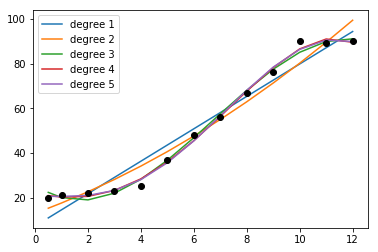

In [31]:
# vander function return powers of the input vector
for deg in [1,2,3,4,5]:
    lr.fit(np.vander(x, deg + 1), y)
    y_lr = lr.predict(np.vander(x, deg + 1))
    plt.plot(x, y_lr, label='degree '+ str(deg))
    plt.legend(loc=2)
    print(r2_score(y, y_lr))
plt.plot(x, y, 'ok')

degree 1 here is the linear fit, and the higher-order polynomial regression is fitting the curve better and r-square jumps 4% higher at degree 3. Beyond the 3rd degree there is not a massive change in r-squared so we can say that the 3rd degree fits better

#### scikit-learn polynomial feature

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [33]:
x = df.Hours_Studied[:, np.newaxis]
y = df.Test_Grade

In [34]:
degree = 4
model = make_pipeline(PolynomialFeatures(degree), lr)

In [35]:
model.fit(x, y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

R-squared using built-in func:  0.9955000184096712


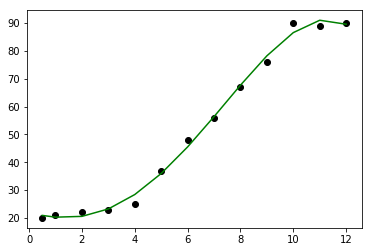

In [36]:
plt.scatter(x, y, color='black')
plt.plot(x, model.predict(x), color='green')
print('R-squared using built-in func: ', r2_score(y, model.predict(x)))

### Multivariate Regression
    So far we have seen simple regression with one independent variable for a given dependent variable. 
    In most of the real-life use cases there will be more than one independent variable,
    so the concept of having multiple independent variables is called multivariate regression
    
    y = m1x1 + m2x2 + m3x3 + .. + mnxn

#### Multicollinearity
    Multicollinearity is an incident where one or more of the independent variables are strongly correlated with each other. 
    In such incidents, we should use only one among correlated independent variables

#### VIF (Variance Inflation Factor)
    VIF is an indicator of the existence of multicollinearity
    a value of greater than 10 is the rule of thumb for possible existence of high multicollinearity
    VIF = 1 means no correlation exists, VIF > 1, but < 5 means moderate correlation exists
    VIF = 1/(1-r^2) # r^2 is coefficient of variable x

In [37]:
# Load data
df = pd.read_csv('data/Housing_Modified.csv')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


In [38]:
# convert binary fields to numeric boolean fields
import sklearn.preprocessing as prep

lb = prep.LabelBinarizer()

df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)

df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0
4,61000.0,6360,2,1,one,1,0,0,0,0,0,0


In [39]:
# Create dummy variables for stories
df_stories = pd.get_dummies(df['stories'], prefix='stories', drop_first=True)
df_stories.head()

,stories_one,stories_three,stories_two
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [40]:
# Join the dummy variable to the main dataframe
df = pd.concat([df, df_stories], axis=1)
del df['stories']

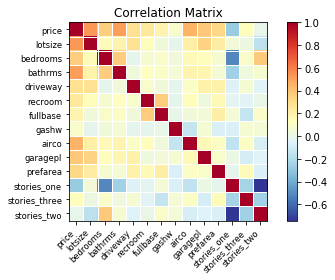

In [41]:
import statsmodels.api as sm
# create correlation matrix
corr = df.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

We can notice from the plot that stories_one has a strong negative correlation with stories_two

#### Remove multicollinearity

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# create a Python list of feature names
independent_variables = ['lotsize', 'bedrooms', 'bathrms','driveway','recroom', 
                         'fullbase','gashw','airco','garagepl', 'prefarea', 'stories_one',
                         'stories_two','stories_three']

In [44]:
# use the list to select a subset from original DataFrame
X = df[independent_variables]
Y= df['price']

In [45]:
thresh = 10
for i in np.arange(0,len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix)
    for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print("vif :", vif)
        print('dropping \'' + X[independent_variables].columns[maxloc] + ' at index: ' + str(maxloc))
        del independent_variables[maxloc]
    else: break
print('Final variables:', independent_variables)

vif : [8.958098087844336, 18.469878559519948, 8.984672347290864, 7.088578542091886, 1.4770152815033917, 2.0133202364723854, 1.1034879198994194, 1.7567462065609025, 1.9826489313438442, 1.5332946465459896, 3.965752674786861, 5.511702408354892, 1.7700402770614867]
dropping 'bedrooms at index: 1
Final variables: ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_one', 'stories_two', 'stories_three']


We can notice that VIF analysis has elemenated bedrooms has its greater than
10, however stories_one and stories_two has been retained.

#### Build the multivariate linear regression model

In [46]:
# create a Python list of feature names
independent_variables = ['lotsize', 'bathrms','driveway', 'recroom', 'fullbase','gashw',
                         'airco','garagepl', 'prefarea', 'stories_one','stories_two','stories_three']


In [47]:
# use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['price']

In [48]:
# Split your data set into 80/20 for train/test datasets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1)

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
# create a fitter model & print the summary
ols = sm.OLS(y_train, X_train).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     731.3
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          1.46e-274
Time:                        17:24:03   Log-Likelihood:                -4828.1
No. Observations:                 436   AIC:                             9680.
Df Residuals:                     424   BIC:                             9729.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           3.8626      0.401      9.629

Durbin-watson value less than 2 is no multicollinearity

In [50]:
# make predictions on the testing set
y_train_pred = ols.predict(X_train)
y_test_pred = ols.predict(X_test)
print("Train MAE: ", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test MAE: ", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train MAE:  11987.660160035877
Train RMSE:  15593.474917800835
Test MAE:  12722.079675396284
Test RMSE:  17509.25004003038


Note that variable ‘stores_three’ and ‘recroom’ have a large p value indicating it’s insignificant. 
So let’s re-run the regression without this variable and look at the results.

In [51]:
independent_variables = ['lotsize', 'bathrms','driveway', 'fullbase','gashw',
                         'airco','garagepl', 'prefarea', 'stories_one','stories_three']

In [52]:
# use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['price']

In [53]:
# Split your data set into 80/20 for train/test datasets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1)

In [54]:
# create a fitter model & print the summary
ols = sm.OLS(y_train, X_train).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     876.8
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          5.12e-277
Time:                        17:24:03   Log-Likelihood:                -4829.2
No. Observations:                 436   AIC:                             9678.
Df Residuals:                     426   BIC:                             9719.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           3.9230      0.394      9.965

In [55]:
# make predictions on the testing set
y_train_pred = ols.predict(X_train)
y_test_pred = ols.predict(X_test)
print("Train MAE: ", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test MAE: ", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train MAE:  11993.343681561726
Train RMSE:  15634.999542918895
Test MAE:  12902.479959106453
Test RMSE:  17694.93414051653


Note that dropping the variables has not impacted adjusted R-squared negatively.

#### Outliers

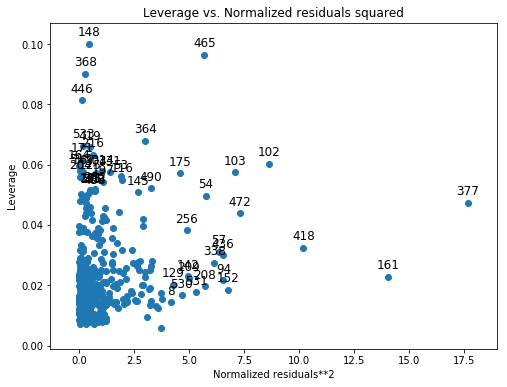

In [56]:
#Outliers
# lets plot the normalized residual vs leverage
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(ols, ax = ax)

In [57]:
# Find outliers
# Bonferroni outlier test
test = ols.outlier_test()
print('Bad data points (bonf(p) < 0.05):')
print(test[test['bonf(p)'] < 0.05])

Bad data points (bonf(p) < 0.05):
     student_resid   unadj_p   bonf(p)
377       4.387449  0.000014  0.006315


#### Homoscedasticity and Normality
The error variance should be constant, which is known has homoscedasticity and the error should be normally distributed

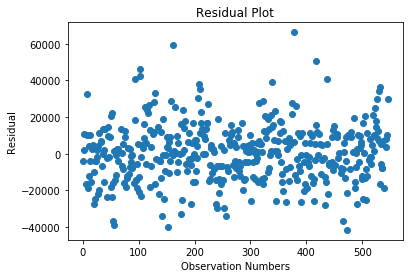

In [58]:
# plot to check homoscedasticity
plt.plot(ols.resid, 'o')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Observation Numbers')
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([1.70076777e-06, 5.95268718e-06, 1.59446978e-05, 2.52989205e-05,
        2.65744963e-05, 1.06297985e-05, 4.03932344e-06, 1.70076777e-06,
        4.25191942e-07, 4.25191942e-07]),
 array([-41552.826287  , -30764.39048767, -19975.95468834,  -9187.51888901,
          1600.91691031,  12389.35270964,  23177.78850897,  33966.2243083 ,
         44754.66010763,  55543.09590696,  66331.53170628]),
 <a list of 10 Patch objects>)

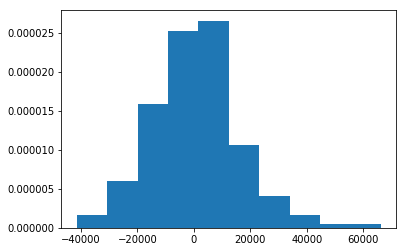

In [59]:
plt.hist(ols.resid, normed=True)

##### Linearity 
the relationships between the predictors and the outcome variables should be linear. If the relationship is not linear then appropriate transformation (such as log, square root, and higher-order polynomials etc) should be applied to the dependent/ independent variable to fix the issue

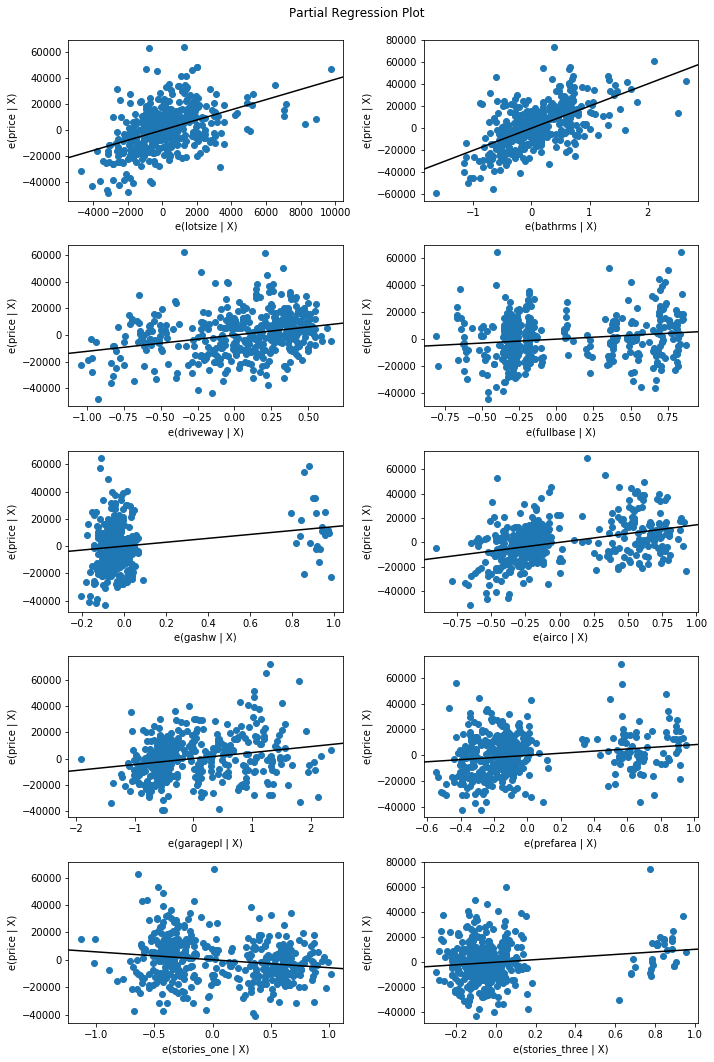

In [60]:
#Linearity plots
fig = plt.figure(figsize=(10,15))
fig = sm.graphics.plot_partregress_grid(ols, fig=fig)

##### Under-fitting
    Under-fitting occurs when the model does not fit the data well and is unable to capture the underlying trend in it.
    In this case we can notice a low accuracy in training and test dataset

##### Over-fitting
    To the contrary, over-fitting occurs when the model fits the data too well, capturing all the noises
    In this case we can notice a high accuracy in the training dataset, whereas the same model will result in a low accuracy on the test dataset.
    This means the model has fitted the line so well to the train dataset that it failed to generalize it to fit well on an unseen dataset

##### Regulation
    With an increase in number of variables, and increase in model complexity, the probability of over-fitting also increases
    Regularization is a technique to avoid the over-fitting problem.
    Ridge and LASSO (Least Absolute Shrinkage and Selection Operator) regression to handle the over-fitting issue
    LASSO: This provides a sparse solution, also known as L1 regularization
    

In [61]:
from sklearn import linear_model

df = pd.read_csv('data/Grade_Set_2.csv')
df.columns = ['x','y']
df.head()

,x,y
0,0.5,20
1,1.0,21
2,2.0,22
3,3.0,23
4,4.0,25


In [62]:
for i in range(2,50):              # power of 1 is already there
    colname = 'x_%d'%i            # new var will be x_power
    df[colname] = df['x']**i

independent_variables = list(df.columns)
independent_variables.remove('y')

X= df[independent_variables]       # independent variable
y= df.y                            # dependent variable

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80,
random_state=1)

In [63]:
# Ridge regression
lr = linear_model.Ridge(alpha=0.001)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("------ Ridge Regression ------")
print("Train MAE: ", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test MAE: ", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Ridge Coef: ", lr.coef_)

------ Ridge Regression ------
Train MAE:  12.775326528414379
Train RMSE:  16.72063936357992
Test MAE:  22.397943556789926
Test RMSE:  22.432642089791898
Ridge Coef:  [ 1.01446487e-88  1.27690319e-87  1.41113660e-86  1.49319913e-85
  1.54589299e-84  1.58049535e-83  1.60336716e-82  1.61825366e-81
  1.62742313e-80  1.63228352e-79  1.63372709e-78  1.63232721e-77
  1.62845333e-76  1.62233965e-75  1.61412730e-74  1.60389073e-73
  1.59165478e-72  1.57740595e-71  1.56110004e-70  1.54266755e-69
  1.52201757e-68  1.49904080e-67  1.47361205e-66  1.44559243e-65
  1.41483164e-64  1.38117029e-63  1.34444272e-62  1.30448024e-61
  1.26111524e-60  1.21418622e-59  1.16354417e-58  1.10906042e-57
  1.05063662e-56  9.88217010e-56  9.21803842e-55  8.51476330e-54
  7.77414158e-53  6.99926407e-52  6.19487106e-51  5.36778815e-50
  4.52745955e-49  3.68659929e-48  2.86198522e-47  2.07542549e-46
  1.35493365e-45  7.36155358e-45  2.64098894e-44 -4.76790286e-45
  2.09597530e-46]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [64]:
# LASSO regression
lr = linear_model.Lasso(alpha=0.001)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("----- LASSO Regression -----")
print("Train MAE: ", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test MAE: ", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("LASSO Coef: ", lr.coef_)

----- LASSO Regression -----
Train MAE:  0.8423742988874686
Train RMSE:  1.2191291855605988
Test MAE:  4.323647594043456
Test RMSE:  4.872324349696694
LASSO Coef:  [ 1.29948409e+00  3.92103580e-01  1.75369422e-02  7.79647589e-04
  3.02339084e-05  3.35699852e-07 -1.13749601e-07 -1.79773817e-08
 -1.93826156e-09 -1.78643532e-10 -1.50240566e-11 -1.18610891e-12
 -8.91794276e-14 -6.43309631e-15 -4.46487394e-16 -2.97784537e-17
 -1.89686955e-18 -1.13767046e-19 -6.22157254e-21 -2.84658206e-22
 -7.32019963e-24  5.16015995e-25  1.18616856e-25  1.48398312e-26
  1.55203577e-27  1.48667153e-28  1.35117812e-29  1.18576052e-30
  1.01487234e-31  8.52473862e-33  7.05722034e-34  5.77507464e-35
  4.68162529e-36  3.76585569e-37  3.00961249e-38  2.39206785e-39
  1.89235649e-40  1.49102460e-41  1.17072537e-42  9.16453614e-44
  7.15512017e-45  5.57333358e-46  4.33236496e-47  3.36163309e-48
  2.60423554e-49  2.01461728e-50  1.55652093e-51  1.20123190e-52
  9.26105400e-54]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


#### Nonlinear Regression

In [65]:
from scipy.optimize import curve_fit

In [66]:
x= np.array([-2,-1.64,-0.7,0,0.45,1.2,1.64,2.32,2.9])
y = np.array([1.0, 1.5, 2.4, 2, 1.49, 1.2, 1.3, 1.2, 0.5])

In [67]:
def func(x, p1,p2):
    return p1*np.sin(p2*x) + p2*np.cos(p1*x)

In [68]:
popt, pcov = curve_fit(func, x, y,p0=(1.0,0.2))

p1 = popt[0]
p2 = popt[1]

residuals = y - func(x,p1,p2)

fres = sum(residuals**2)
curvex=np.linspace(-2,3,100)
curvey=func(curvex,p1,p2)

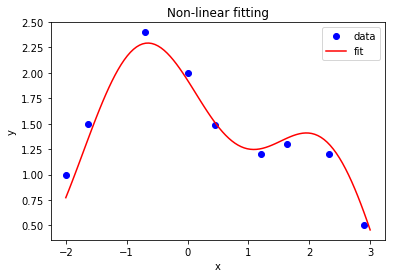

In [69]:
plt.plot(x,y,'bo ')
plt.plot(curvex,curvey,'r')
plt.title('Non-linear fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data','fit'],loc='best')
plt.show()

### Logistic Regression

In [70]:
df = pd.read_csv('data/Grade_Set_1_Classification.csv')
df.head()

,Hours_Studied,Result
0,2,0
1,3,0
2,4,0
3,5,1
4,6,1


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,9.0,6.000000,2.738613,2.0,4.0,6.0,8.0,10.0
Result,9.0,0.666667,0.500000,0.0,0.0,1.0,1.0,1.0


In [72]:
x = df.Hours_Studied[:, np.newaxis]
y = df.Result

In [73]:
#Create linear regression object
lr = lm.LinearRegression()

In [74]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,0,'Hours_Studied')

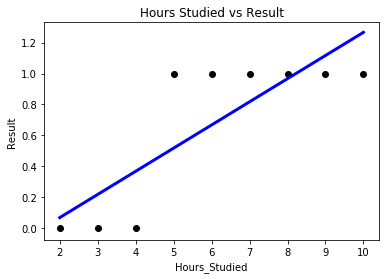

In [75]:
plt.scatter(x, y , color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')

In [76]:
# Add predict value to the data frame
df['Result_Pred'] = lr.predict(x)

In [77]:
print("R Squared : ", r2_score(df.Result, df.Result_Pred))
print("Mean Absolute Error: ", mean_absolute_error(df.Result, df.Result_Pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Result, df.Result_Pred)))

R Squared :  0.675
Mean Absolute Error:  0.2296296296296296
Root Mean Squared Error:  0.26874192494328497


In the above plot we can see that linear regression is not able to draw boundaries to classify observations.

A logit is the log base e(log) of the odds, so using the logit model:
    
    log(p / p(1 - p)) = mx + c

Logistic regression equation probability(y=1) = 1 / 1 + e ^ -(mx +c )

In [79]:
# Plot sigmoid function
x = np.linspace(-10,10, 100)
y = 1.0 / (1.0 + np.exp(-x))

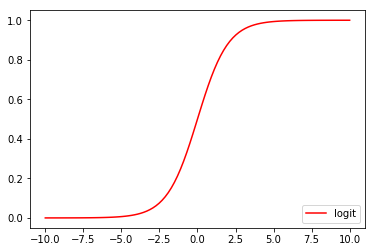

In [80]:
plt.plot(x, y, 'r-', label='logit')
plt.legend(loc='lower right')

##### Logistic regression using scikit learn

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
# manually add intercept
df['intercept'] =  1
independent_variables = ['Hours_Studied', 'intercept']

In [83]:
x = df[independent_variables]
y = df['Result']

In [85]:
model = LogisticRegression()
model = model.fit(x, y)

In [86]:
# Check the accuracy on the training set
model.score(x, y)
print(model.predict(x))
print(model.predict_proba(x)[:,0])

[0 0 1 1 1 1 1 1 1]
[0.61376902 0.50005944 0.38634371 0.28380748 0.19963164 0.13569177
 0.08993009 0.05855584 0.03767413]


Text(0.5,0,'Hours_Studied')

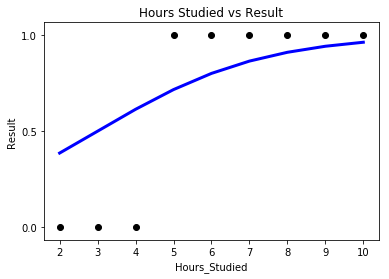

In [87]:
# plotting fitted line
plt.scatter(df.Hours_Studied, y, color='black')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:, 1], color='blue', linewidth=3)
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')

##### Confusion matrix

In [88]:
from sklearn import metrics

In [89]:
print("Accuracy: ", metrics.accuracy_score(y, model.predict(x)))
print("AUC: ", metrics.roc_auc_score(y, model.predict_proba(x)[:,1]))

Accuracy:  0.8888888888888888
AUC:  1.0


In [93]:
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y, model.predict(x)))
print("Classification report: ")
print(metrics.classification_report(y, model.predict(x)))

Confusion Matrix: 
[[2 1]
 [0 6]]
Classification report: 
             precision    recall  f1-score   support

          0       1.00      0.67      0.80         3
          1       0.86      1.00      0.92         6

avg / total       0.90      0.89      0.88         9

